In [101]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import ylabel
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import warnings
data = pd.read_csv('data.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [102]:
data.head(15)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [103]:

data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Check for Duplicate Rows

In [104]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4595    False
4596    False
4597    False
4598    False
4599    False
Length: 4600, dtype: bool

Identify Column Data Types

In [105]:
cat_col = [col for col in data.columns if data[col].dtype == 'object']
num_col = [col for col in data.columns if data[col].dtype != 'object']
print('Categorical columns: ',cat_col)
print('Numerical columns: ',num_col )

Categorical columns:  ['date', 'street', 'city', 'statezip', 'country']
Numerical columns:  ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


Count Unique Values in the Categorical Columns

In [106]:
data[cat_col].nunique()

date          70
street      4525
city          44
statezip      77
country        1
dtype: int64

Calculate Missing Values as Percentage

In [107]:
data.drop(cat_col, axis=1, inplace=True)

In [108]:
round(data.isnull().sum()/ data.shape[0] *100, 2)

price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
dtype: float64

Identify Target & Features

In [109]:
X = data.drop("price", axis = 1)
y = data["price"]

Filling Missing Values (Imputation)

In [110]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

Handle Missing Values

In [111]:
data.fillna(data.median(numeric_only= True), inplace= True)

In [112]:
data.drop_duplicates(inplace=True)

Exploratory Data Analysis (EDA)

In [113]:
data.corr(numeric_only=True)["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64

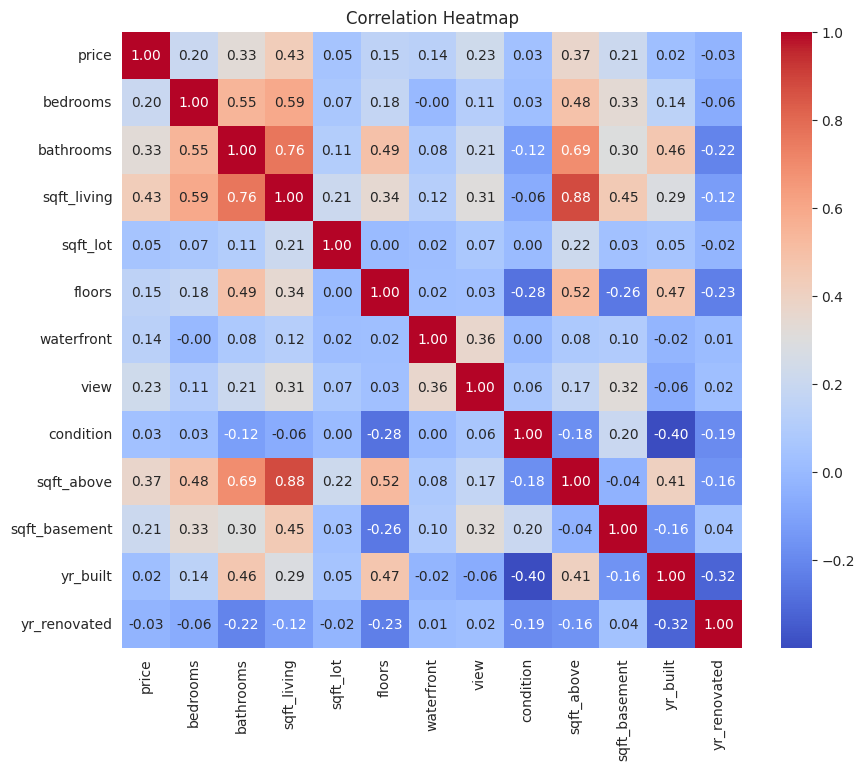

In [115]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'House Price Distribution')

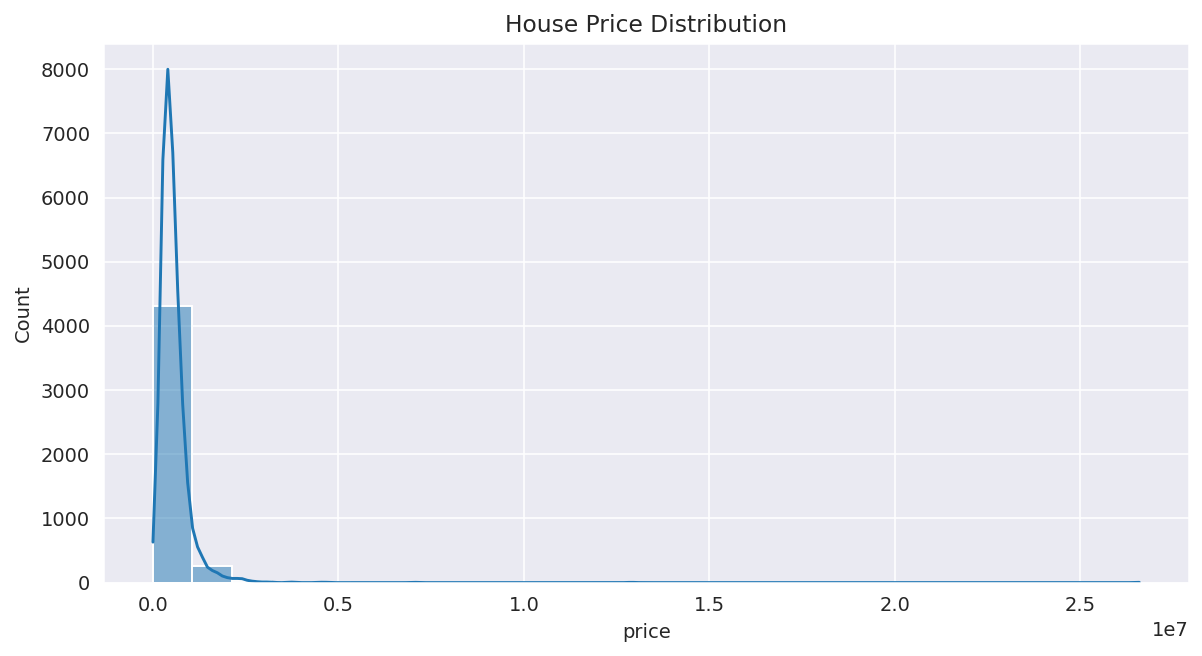

In [44]:
plt.figure(figsize=(10, 5), dpi= 140)
sns.histplot(data=data, x= 'price',kde= True, bins=25)
plt.title("House Price Distribution")

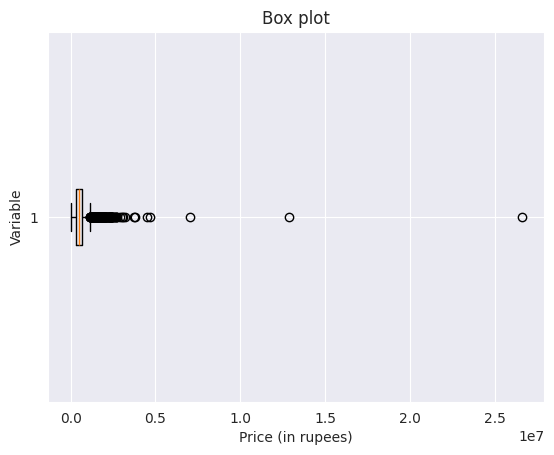

In [45]:
plt.boxplot(data['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Price (in rupees)')
plt.title('Box plot')
plt.show()

Calculate Outlier Boundaries and Remove Them

In [46]:
Q1= data['price'].quantile(0.25)
Q3= data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print( "Lower Bound :", lower_bound)
print( "Upper Bound : " , upper_bound)

Lower Bound : -175256.25
Upper Bound :  1153093.75


🔸 Negative lower bound → ignore

In [47]:
data_clean = data[(data['price'] >= 0) & (data['price'] <= upper_bound)]

Impute Missing Data Again if Any

<Axes: xlabel='price'>

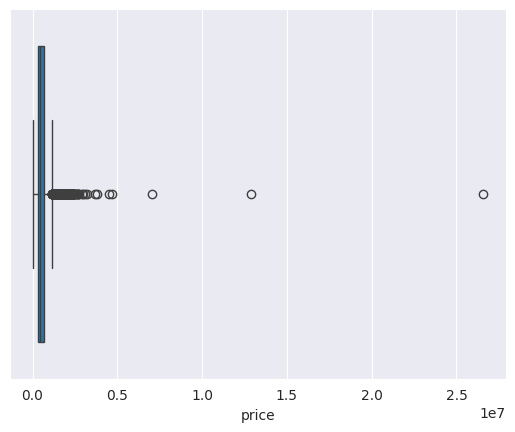

In [48]:
sns.boxplot(x= data["price"])

Recalculate Outlier Bounds and Remove Outliers from the Updated Data

In [49]:
data["price_per_sqft"] = data['price']/ data['sqft_living']
data["Toral_Room"] = data["bedrooms"] + data["bathrooms"]
data["House_Age"] = 2026 - data["yr_built"]

Feature Scaling

In [69]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size= 0.2, train_size= 777)
print(f"X_train:{X_train.shape}\n x_test:{X_test.shape}")
print(f'y_train:{y_train.shape},y_test:{y_test.shape}')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

X_train:(777, 12)
 x_test:(920, 12)
y_train:(777,),y_test:(920,)


Price Summary

In [70]:
print("Average price: ", data["price"].mean())
print("Lowest price: ", data["price"].min())
print("Highest price: ", data["price"].max())

Average price:  551962.9884732141
Lowest price:  0.0
Highest price:  26590000.0


In [83]:
X = data[["sqft_living"]]
y = data["price"]
model = LinearRegression()
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [84]:
data["Y_pred"] = model.predict(X)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Y_pred
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,350567.418016
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,932572.220763
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,499217.995341
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,516854.504515
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,501737.496651


Visualizing the Regression Line

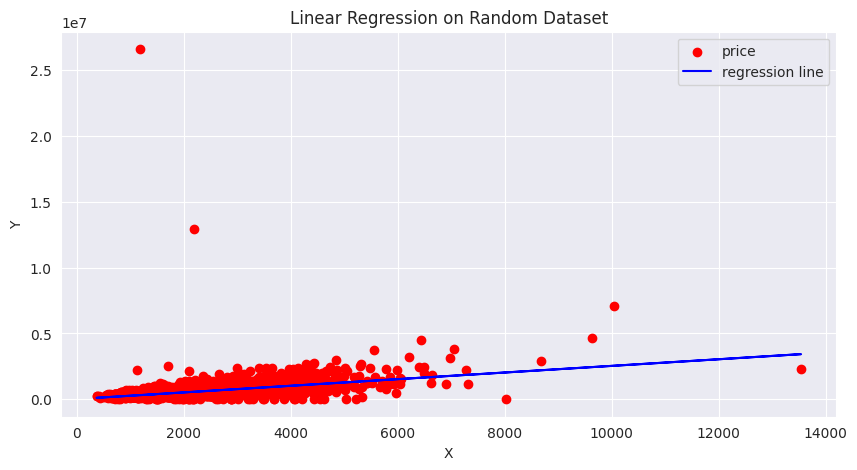

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(X,y , color= 'red', label='price')
plt.plot(X, Y_pred, color= 'blue', label= 'regression line')
plt.title("Linear Regression on Random Dataset")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

Slop and Intercept

In [81]:
print("Slope (coefficient): ", model.coef_)
print("Intercept: ", model.intercept_)

Slope (coefficient):  [251.95013106]
Intercept:  12954.242396381567
